All the modules that were required in my codes are imported below

In [44]:
import wbdata   # to get data from world bank 
import pandas as pd   # for processing and analysing data
import matplotlib.pyplot as plt  # for visualising data on plots
import quandl  # for allowing access of data from quandl
import datetime as datetime  # for dealing with date and time objects for instance to change years string to datetime objects
import numpy as np   # performing different mathematical operations on data
import random
from tabulate import tabulate # for enclosing data in tables

In [510]:
# define indicator code and name for GDP per capita data from world bank 
gdp_indicator = {"NY.GDP.PCAP.CD":"GDP per capita"}
gdp_df= wbdata.get_dataframe(gdp_indicator)  # define a dataframe from the indicator
mal_indicator= {"SH.STA.MALN.ZS" : "Malnutrition prevalence"}  # define malnutrition indicator code and name
malnutrition_df= wbdata.get_dataframe(mal_indicator) # get a dataframe malnutrition from the indicator
malnutrition_df.reset_index(inplace=True) # reset the index from country

metadata=pd.read_excel("API_NY.GDP.PCAP.CD_DS2_en_excel_v2_5795829.xls", sheet_name="Metadata - Countries")
region_GDP=metadata.loc[metadata['Region']!= "North America"] # extract the regions excluding North america
updated_region =region_GDP.rename(columns={'TableName':'country'})
gdp_df.reset_index(inplace=True)
merged_GDP=pd.merge(updated_region, gdp_df, on="country")# combine GDP values and regions in one dataframe.

# read malnutrition metadata sheet
malnutrition_metadata=pd.read_excel("API_SH.STA.MALN.ZS_DS2_en_excel_v2_5730295.xls", sheet_name="Metadata - Countries")
merged_malnutrition=pd.merge(updated_region,malnutrition_df, on="country")

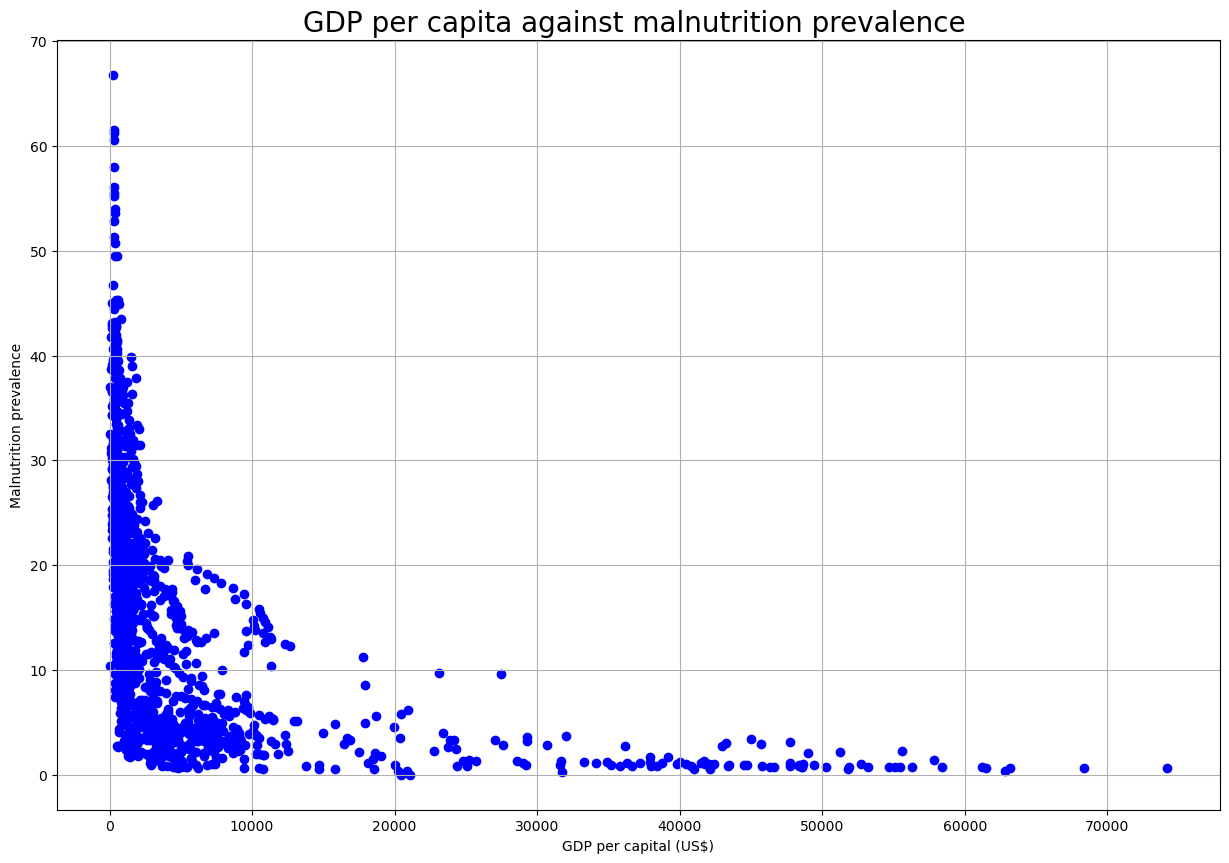

In [511]:
plt.figure(figsize=(15,10))
plt.scatter(gdp_df['GDP per capita'],malnutrition_df["Malnutrition prevalence"], c="blue")
# decorate the graph i.e title, axes name
plt.title("GDP per capita against malnutrition prevalence ", fontsize=20)
plt.xlabel("GDP per capital (US$)")
plt.ylabel("Malnutrition prevalence")
plt.grid()
plt.show()   # for displaying the graph

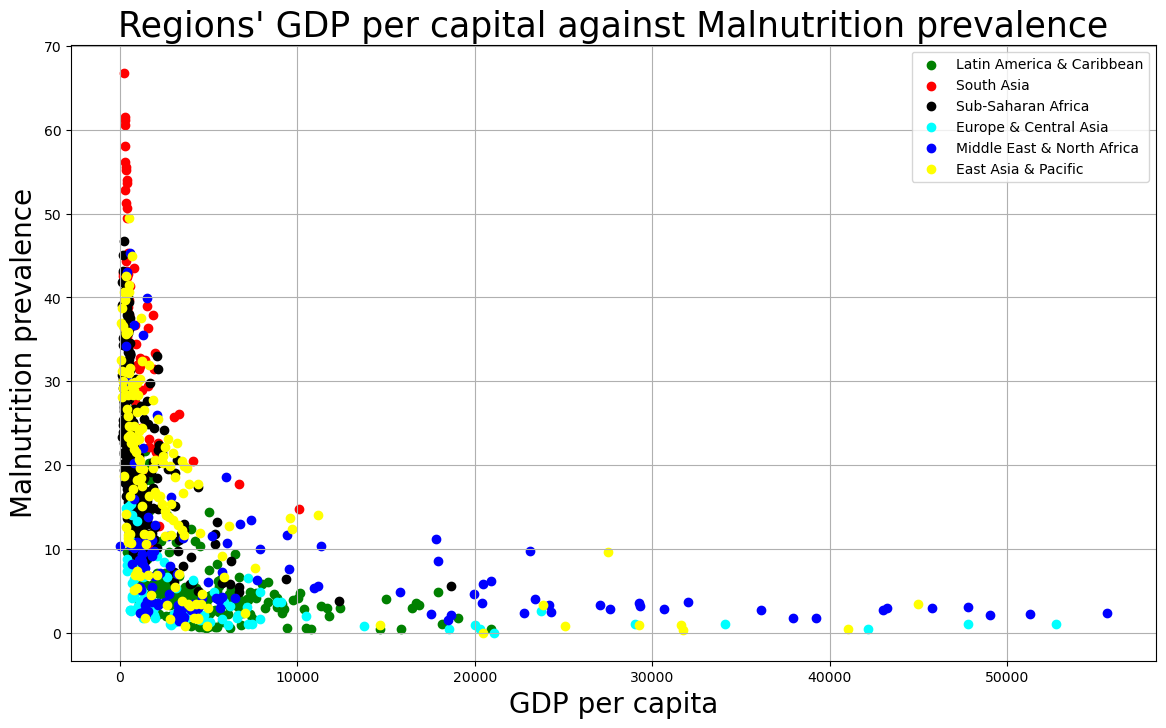

In [452]:
# save all regions excluding north America in the list 
regions=['Latin America & Caribbean','South Asia','Sub-Saharan Africa', 'Europe & Central Asia', 'Middle East & North Africa', 'East Asia & Pacific']
# initialise the list of colours that you want to use to represent Regions respectively, while drawing
colours=['green' ,'red','black', 'cyan', 'blue', 'yellow']
plt.figure(figsize=(14,8)) # for adjusting plot size
# for each region and color in zipped folder of regions and colours do the following operations
for region, color in zip(regions, colours):
    # filter the dataframe and remain with data for the specific region for both GDP data and malnutrition data
        region_gdp=merged_GDP.loc[merged_GDP['Region']== region] 
        region_malnutrition=merged_malnutrition.loc[merged_malnutrition['Region']==region]
    # plot the scatter plot of the region's malnutrition prevalence against the region's GDP and display them with a corresponding color from the color list defined above
        plt.scatter(region_gdp['GDP per capita'],region_malnutrition['Malnutrition prevalence'], c=color, label= region)
    # go on with decorating the graph i.e titles, y and x  axes labels
plt.title("Regions' GDP per capital against Malnutrition prevalence", fontsize=25)
plt.xlabel("GDP per capita", fontsize=20)
plt.ylabel("Malnutrition prevalence", fontsize=20)
plt.grid()
plt.legend() # show the legend on the graph
plt.show()  # for displaying the graph 

In [465]:
updated_metadata= malnutrition_metadata.rename(columns={"TableName": "country"})
joined_income_malval= pd.merge(updated_metadata, malnutrition_df, on="country")
joined_income_GDP= pd.merge(updated_metadata, gdp_df, on="country")


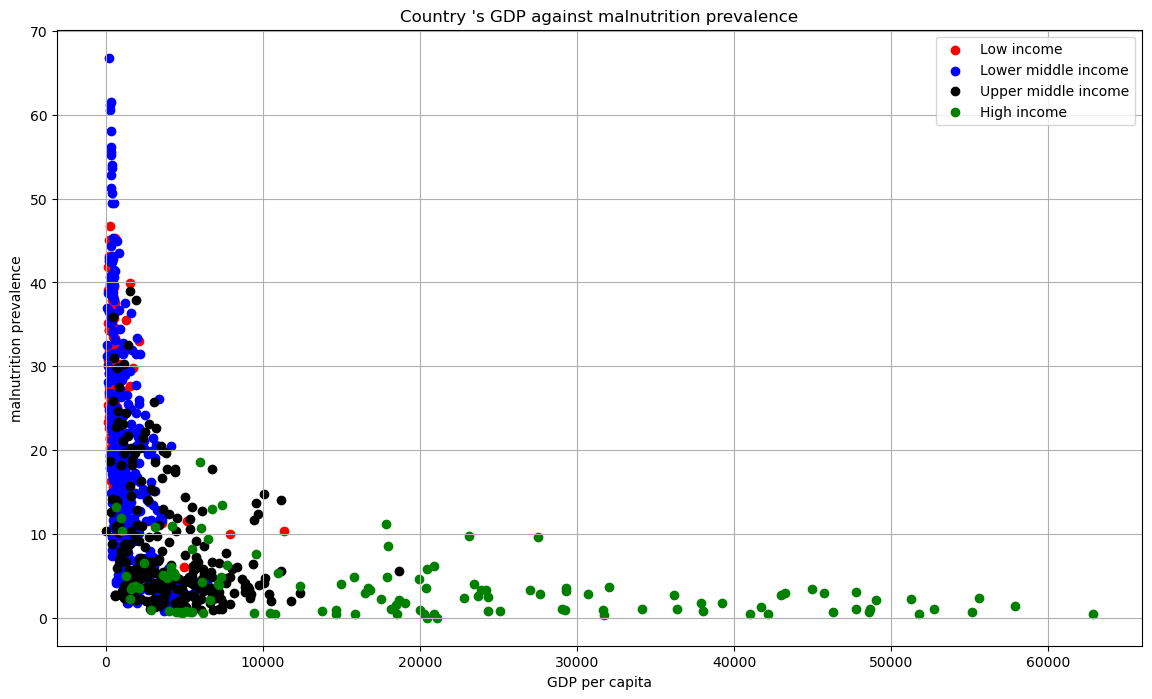

In [498]:
income_levels=["Low income","Lower middle income", "Upper middle income", "High income"]
colours=['red' ,'blue','black', 'green']
plt.figure(figsize=(14,8))
for incomelevel , color in zip(income_levels, colours):
        incomeLevel_gdp=joined_income_GDP.loc[joined_income_GDP['IncomeGroup']== incomelevel]
        incomeLevel_malnutrition=joined_income_malval.loc[joined_income_malval['IncomeGroup']==incomelevel]
        plt.scatter(incomeLevel_gdp['GDP per capita'],incomeLevel_malnutrition['Malnutrition prevalence'], c=color, label= incomelevel)
        
plt.title("Country 's GDP against malnutrition prevalence")
plt.xlabel("GDP per capita")
plt.ylabel("malnutrition prevalence")
plt.legend()
plt.grid()
plt.show()

# Exercise 2

In [340]:
wheat_data=quandl.get("ODA/PWHEAMT_USD")
oil_prices=quandl.get("WGEC/WLD_CRUDE_WTI")
gold_prices=quandl.get("BUNDESBANK/BBK01_WT5511")
oil_prices.to_csv('oil_prices.csv')
wheat_data.to_csv('wheat_data.csv')
gold_prices.to_csv('gold_prices.csv')


LimitExceededError: (Status 429) (Quandl Error QELx01) You have exceeded the anonymous user limit of 50 calls per day. To make more calls today, please register for a free Nasdaq Data Link account and then include your API key with your requests.

In [376]:
wheat_prices= pd.read_csv("wheat_data.csv").dropna()
gold_prices=pd.read_csv("gold_prices.csv").dropna()
oil_prices=pd.read_csv("oil_prices.csv").dropna()
oil_prices.rename(columns={"Value": "oil prices"}, inplace=True)
gold_prices.rename(columns={"Value": "gold prices"}, inplace=True)
wheat_prices.rename(columns={"Value": "wheat prices"}, inplace=True)


In [472]:
combined_df=pd.merge(oil_prices,gold_prices, on="Date")
updated_df=pd.merge(combined_df,wheat_prices, on="Date")
max_oil_id= updated_df['oil prices'].idxmax()
max_oil_price=updated_df['oil prices'][max_oil_id]
max_wheat_id= updated_df['wheat prices'].idxmax()
max_wheat_price=updated_df['wheat prices'][max_wheat_id]
max_gold_id= updated_df['gold prices'].idxmax()
max_gold_price=updated_df['gold prices'][max_gold_id]
min_oil_id=updated_df['oil prices'].idxmin()
updated_dates=pd.to_datetime(updated_df['Date'])
min_oil_id= updated_df['oil prices'].idxmin()
min_oil_price=updated_df['oil prices'][min_oil_id]
min_wheat_id= updated_df['wheat prices'].idxmin()
min_wheat_price=updated_df['wheat prices'][min_wheat_id]
min_gold_id= updated_df['gold prices'].idxmin()
min_gold_price=updated_df['gold prices'][min_gold_id]
min_oil_id=updated_df['oil prices'].idxmin()

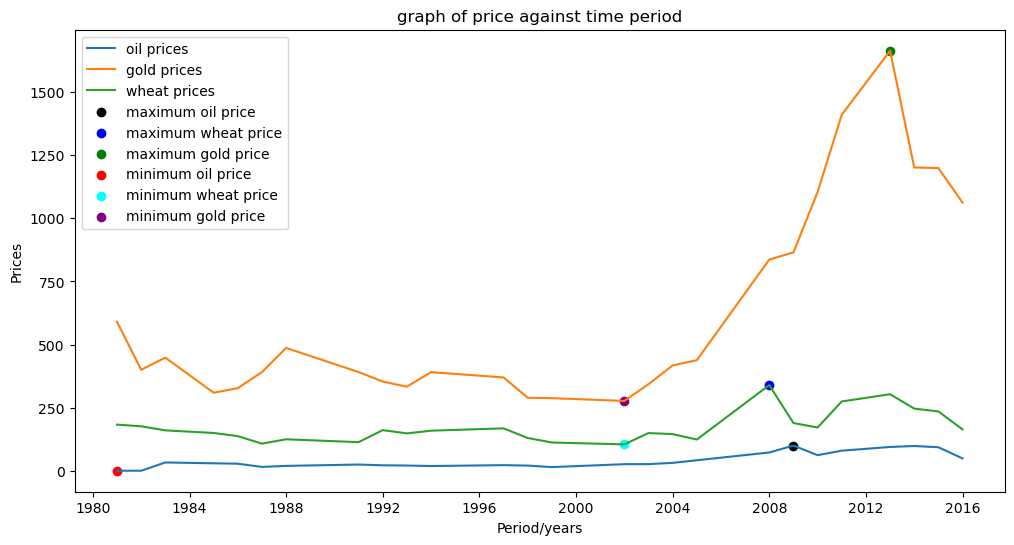

maximum and minimum prices and their dates
╒══════════════════════╤═════════════════════╤═══════════╕
│ feature              │ date                │     price │
╞══════════════════════╪═════════════════════╪═══════════╡
│ maximum oil price    │ 2008-12-31 00:00:00 │   99.5577 │
├──────────────────────┼─────────────────────┼───────────┤
│ minimum oil price    │ 1980-12-31 00:00:00 │    0      │
├──────────────────────┼─────────────────────┼───────────┤
│ maximum gold price   │ 2012-12-31 00:00:00 │ 1664      │
├──────────────────────┼─────────────────────┼───────────┤
│ minimum gold price   │ 2001-12-31 00:00:00 │  276.5    │
├──────────────────────┼─────────────────────┼───────────┤
│ maximum wheat price  │ 2007-12-31 00:00:00 │  339.226  │
├──────────────────────┼─────────────────────┼───────────┤
│ minimum  wheat price │ 2001-12-31 00:00:00 │  104.37   │
╘══════════════════════╧═════════════════════╧═══════════╛


In [507]:

plt.figure(figsize=(12,6))
plt.plot(updated_dates, updated_df['oil prices'], label='oil prices')
plt.plot(updated_dates, updated_df['gold prices'], label='gold prices')
plt.plot(updated_dates, updated_df['wheat prices'], label='wheat prices')
plt.scatter(updated_dates[max_oil_id],max_oil_price, color='black', label='maximum oil price')
plt.scatter(updated_dates[max_wheat_id],max_wheat_price, color='blue', label='maximum wheat price')
plt.scatter(updated_dates[max_gold_id],max_gold_price, color='green', label='maximum gold price')
plt.scatter(updated_dates[min_oil_id],min_oil_price, color='red', label='minimum oil price')
plt.scatter(updated_dates[min_wheat_id],min_wheat_price, color='', label='minimum wheat price')
plt.scatter(updated_dates[min_gold_id],min_gold_price, color='purple', label='minimum gold price')

plt.title("graph of price against time period")
plt.xlabel("Period/years")
plt.ylabel("Prices")
plt.legend()
plt.show()

print("maximum and minimum prices and their dates")
prices=[["maximum oil price", updated_dates[max_oil_id],max_oil_price],
        ["minimum oil price", updated_dates[min_oil_id],  min_oil_price],
        ["maximum gold price" , updated_dates[max_gold_id], max_gold_price],
         ["minimum gold price", updated_dates[min_gold_id],  min_gold_price],
         ["maximum wheat price" ,updated_dates[max_wheat_id], max_wheat_price],
          ["minimum  wheat price", updated_dates[min_wheat_id],  min_wheat_price]
       ]
titles=["feature", "date", "price"]
print(tabulate(prices,headers=titles, tablefmt="fancy_grid" ))


# Exercise 3

In [36]:
co2_data=pd.read_excel("./API_EN.ATM.CO2.xls", sheet_name="Data", skiprows=range(0,3))
emission_2010=co2_data['2010']
required=['mean', 'std',"5%", '25%',"50%", "75%", "95%"]
titles=["parameter", "value"]
data=[]
for elt in required:
    Describe= emission_2010.describe(percentiles=[0.05,0.25,0.5,0.75,0.95])[elt]
    data.append([elt, Describe])
print("summary statistics for CO2 emissions in 2010")    
print(tabulate(data,headers=titles,tablefmt="fancy_grid"))


summary statistics for CO2 emissions in 2010
╒═════════════╤═══════════╕
│ parameter   │     value │
╞═════════════╪═══════════╡
│ mean        │  4.30466  │
├─────────────┼───────────┤
│ std         │  5.06919  │
├─────────────┼───────────┤
│ 5%          │  0.11486  │
├─────────────┼───────────┤
│ 25%         │  0.756011 │
├─────────────┼───────────┤
│ 50%         │  2.66714  │
├─────────────┼───────────┤
│ 75%         │  5.8918   │
├─────────────┼───────────┤
│ 95%         │ 15.172    │
╘═════════════╧═══════════╛


In [37]:
school_enroll= pd.read_excel("API_SE.PRM.NENR_DS2_en_excel_v2_5840345.xls", sheet_name="Data", skiprows=range(0,3) )
school_enroll2010= school_enroll["2010"]
required=['mean', 'std',"5%", '25%',"50%", "75%", "95%"]
titles=["parameter", "value"]
statistics=[]
for member in required:
    described= school_enroll2010.describe(percentiles=[0.05,0.25,0.5,0.75,0.95])[member]
    statistics.append([member, described])
print("summary statistics for school enrollment in 2010")
print(tabulate(statistics,headers=titles,tablefmt="fancy_grid"))


summary statistics for school enrollment in 2010
╒═════════════╤══════════╕
│ parameter   │    value │
╞═════════════╪══════════╡
│ mean        │ 90.1051  │
├─────────────┼──────────┤
│ std         │  9.52763 │
├─────────────┼──────────┤
│ 5%          │ 66.6568  │
├─────────────┼──────────┤
│ 25%         │ 87.801   │
├─────────────┼──────────┤
│ 50%         │ 92.9567  │
├─────────────┼──────────┤
│ 75%         │ 95.9344  │
├─────────────┼──────────┤
│ 95%         │ 98.8728  │
╘═════════════╧══════════╛


# Exercise 4

In [499]:
gdp_indicator= {"NY.GDP.PCAP.CD" : "GDP per capita"}
gdp_df = wbdata.get_dataframe(gdp_indicator)
gdp_df=gdp_df.reset_index()

In [502]:
indicator=  {"SP.DYN.TFRT.IN": "Fertility rate", "NY.GDP.PCAP.CD" : "GDP per capita"}
fertility_df = wbdata.get_dataframe(
    indicators=indicator,
    country='all',
    data_date=None,
    freq='Y',
    source=None,
    convert_date=False,
    keep_levels=False,
    cache=True,
)
countries_info= pd.DataFrame(wbdata.get_country())
# rename the columns of country name in country info dataframe from name to country just same as it is named in data dataframe 
countries_info.rename(columns={'name':'country'}, inplace=True)

fertility_df.reset_index(inplace=True)
region_fertility= pd.merge(fertility_df,countries_info, on='country', how='left')
fertility2010 = region_fertility[region_fertility['date']=='2010']
fertility1990 = region_fertility[region_fertility['date']=='1990']



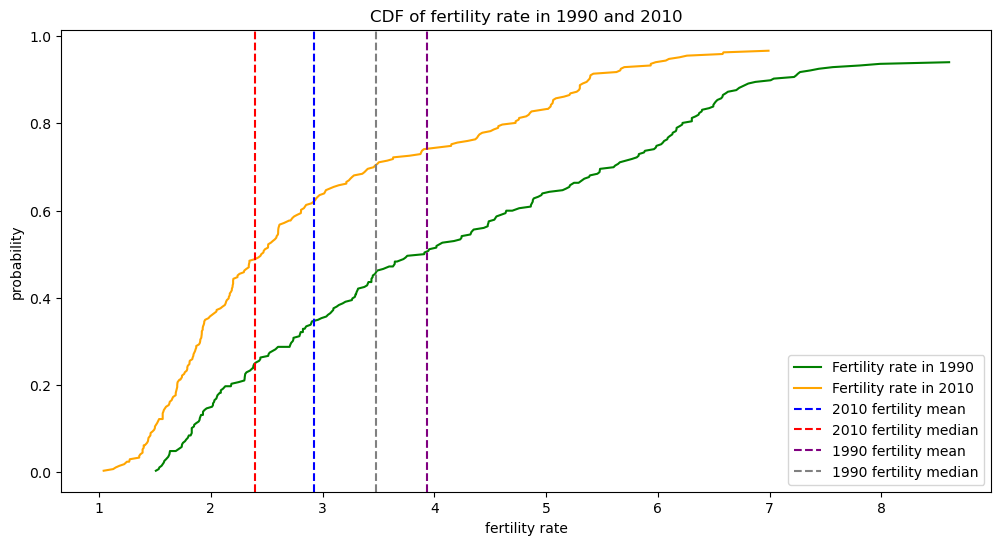

In [503]:
sorted2010_df=fertility2010.sort_values(by="Fertility rate")
sorted1990_df=fertility1990.sort_values(by="Fertility rate")
def cdf(df):
    return df["Fertility rate"].rank()/len(df)
 
plt.figure(figsize=(12,6))
plt.title("CDF of fertility rate in 1990 and 2010")
plt.plot(sorted1990_df['Fertility rate'], cdf(sorted_df),c="green", label="Fertility rate in 1990")
plt.plot(sorted2010_df['Fertility rate'], cdf(sorted1990_df),c="orange", label="Fertility rate in 2010")
plt.xlabel("fertility rate") 
plt.ylabel("probability")  
plt.axvline(x= sorted2010_df['Fertility rate'].mean(), c="blue",linestyle="--", label="2010 fertility mean")
plt.axvline(x= sorted2010_df['Fertility rate'].median(),c="red",linestyle="--", label="2010 fertility median")
plt.axvline(x= sorted1990_df['Fertility rate'].mean(), c="purple",linestyle="--", label="1990 fertility mean")
plt.axvline(x= sorted1990_df['Fertility rate'].median(),c="gray",linestyle="--", label="1990 fertility median")
plt.legend()
plt.show()

# Exercise 5

C:\Users\Leonard\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Conditional Formatting extension is not supported and will be removed
  for idx, row in parser.parse():


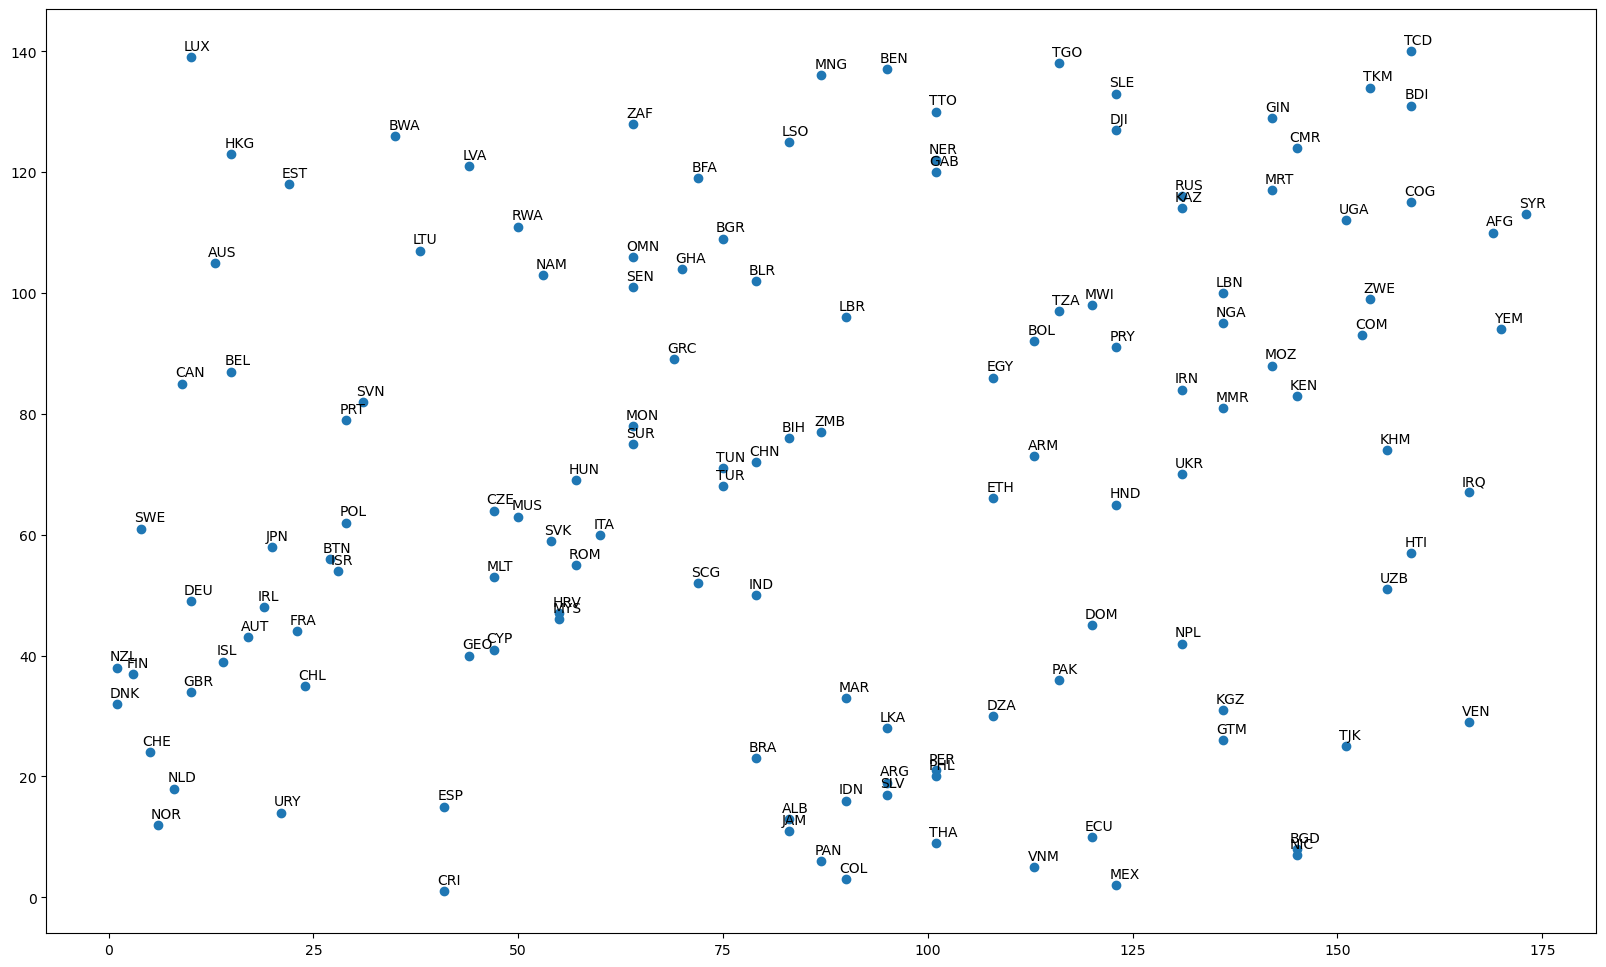

In [336]:
cpi_data= pd.read_excel("CPI2016_Results.xlsx", sheet_name="CPI2016_FINAL_16Jan").iloc[:,0:5].set_index("Country")
dpi_data=pd.read_excel("hpi-data-2016.xlsx", sheet_name="Complete HPI data", skiprows=range(0,5)).iloc[:,1:4].set_index("Country")
combined_data=pd.merge(cpi_data, dpi_data, right_index=True, left_index=True)
plt.figure(figsize=(20,12))
plt.scatter(combined_data["Rank"], combined_data["HPI Rank"] )
country_code=list(combined_data.reset_index()["WB Code"])
for code in country_code:
    plt.annotate(code, xy=(combined_data["Rank"].loc[combined_data["WB Code"]==code], combined_data["HPI Rank"].loc[combined_data["WB Code"]==code]), xytext=(-5, 5), textcoords='offset points')



In [497]:

pd.DataFrame(wbdata.get_country())

,id,iso2Code,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
0,ABW,AW,Aruba,"{'id': 'LCN', 'iso2code': 'ZJ', 'value': 'Lati...","{'id': '', 'iso2code': '', 'value': ''}","{'id': 'HIC', 'iso2code': 'XD', 'value': 'High...","{'id': 'LNX', 'iso2code': 'XX', 'value': 'Not ...",Oranjestad,-70.0167,12.5167
1,AFE,ZH,Africa Eastern and Southern,"{'id': 'NA', 'iso2code': 'NA', 'value': 'Aggre...","{'id': '', 'iso2code': '', 'value': ''}","{'id': 'NA', 'iso2code': 'NA', 'value': 'Aggre...","{'id': '', 'iso2code': '', 'value': 'Aggregates'}",,,
2,AFG,AF,Afghanistan,"{'id': 'SAS', 'iso2code': '8S', 'value': 'Sout...","{'id': 'SAS', 'iso2code': '8S', 'value': 'Sout...","{'id': 'LIC', 'iso2code': 'XM', 'value': 'Low ...","{'id': 'IDX', 'iso2code': 'XI', 'value': 'IDA'}",Kabul,69.1761,34.5228
3,AFR,A9,Africa,"{'id': 'NA', 'iso2code': 'NA', 'value': 'Aggre...","{'id': '', 'iso2code': '', 'value': ''}","{'id': 'NA', 'iso2code': 'NA', 'value': 'Aggre...","{'id': '', 'iso2code': '', 'value': 'Aggregates'}",,,
4,AFW,ZI,Africa Western and Central,"{'id': 'NA', 'iso2code': 'NA', 'value': 'Aggre...","{'id': '', 'iso2code': '', 'value': ''}","{'id': 'NA', 'iso2code': 'NA', 'value': 'Aggre...","{'id': '', 'iso2code': '', 'value': 'Aggregates'}",,,
...,...,...,...,...,...,...,...,...,...,...
292,XZN,A5,Sub-Saharan Africa excluding South Africa and ...,"{'id': 'NA', 'iso2code': 'NA', 'value': 'Aggre...","{'id': '', 'iso2code': '', 'value': ''}","{'id': 'NA', 'iso2code': 'NA', 'value': 'Aggre...","{'id': '', 'iso2code': '', 'value': 'Aggregates'}",,,
293,YEM,YE,"Yemen, Rep.","{'id': 'MEA', 'iso2code': 'ZQ', 'value': 'Midd...","{'id': 'MNA', 'iso2code': 'XQ', 'value': 'Midd...","{'id': 'LIC', 'iso2code': 'XM', 'value': 'Low ...","{'id': 'IDX', 'iso2code': 'XI', 'value': 'IDA'}",Sana'a,44.2075,15.352
294,ZAF,ZA,South Africa,"{'id': 'SSF', 'iso2code': 'ZG', 'value': 'Sub-...","{'id': 'SSA', 'iso2code': 'ZF', 'value': 'Sub-...","{'id': 'UMC', 'iso2code': 'XT', 'value': 'Uppe...","{'id': 'IBD', 'iso2code': 'XF', 'value': 'IBRD'}",Pretoria,28.1871,-25.746
295,ZMB,ZM,Zambia,"{'id': 'SSF', 'iso2code': 'ZG', 'value': 'Sub-...","{'id': 'SSA', 'iso2code': 'ZF', 'value': 'Sub-...","{'id': 'LMC', 'iso2code': 'XN', 'value': 'Lowe...","{'id': 'IDX', 'iso2code': 'XI', 'value': 'IDA'}",Lusaka,28.2937,-15.3982
